In [1]:
import sys
sys.path.append("../../")
sys.path.append("..")
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
import sys
sys.path.append("../")
import os

import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import trange

from cellmating.utils import file_traverse, load_from_pkl, dump_to_pkl
from cellmating.io import imread
import json
import networkx as nx
from script_wlli.mating_feature_extract import extract_mating_features, stack_features

In [3]:
root = "/media/wd/T7/data/mating_all/20220903_YAV2104xYAV2105_003/tif/"
file_list = file_traverse(root, file_regular=r".*track.tif")
print("totle images: ", len(file_list))

totle images:  19


In [4]:
from script_wlli.utils import load_configs
config = load_configs("../config_mating.yml")

In [5]:
file_name = file_list[0]
image = imread(file_name)

In [6]:
with open(file_name[:-10]+".json", 'r') as json_file:
    keys = json.load(json_file)
print(keys)
tracker = load_from_pkl(file_name[:-10]+".tracker")

{'2193': [770, 1020, 382, 632], '3142': [0, 250, 605, 855], '3165': [135, 385, 604, 854], '3185': [4, 254, 188, 438], '3186': [0, 250, 0, 250]}


In [7]:
all_images_feature_over_time = {}
for key in keys:
    print(int(key))
    bbox = keys[key]
    crop_image = image[:,:,bbox[0]:bbox[1],bbox[2]:bbox[3]]
    # node = nx.node_connected_component(tracker.network.to_undirected(), int(key)%1000)
    # g = tracker.network.subgraph(node)
    c_mating, data = extract_mating_features(crop_image, tracker.network, int(key)%1000)
    dump_to_pkl(c_mating, file_name[:-4]+".mating")
    # stack features
    all_images_feature_over_time = stack_features(all_images_feature_over_time, data, os.path.basename(file_name), config=config)
    except Exception as error:
    # handle the exception
        print(file_name," : ", error)

2193


3142
3165


3185


3186


In [9]:
dump_to_pkl(all_images_feature_over_time,"./data/extract_feature_object/all_image_time_feature_20240414.obj")
for key in all_images_feature_over_time:
    data = all_images_feature_over_time[key]
    data.to_csv("./data/time_split_csv/20240414/"+key+".csv")

,p_id,p_f_type,p_start,p_area,p_axis,p_eccentricity,p_neighbor_same,p_neighbor_diff,m_id,m_f_type,...,p_angle,m_angle,p_angle_index,m_angle_index,center_dist,nearest_dist,flag,time_measure,time_0,ref
0,148,1,-115,1205.0,43.815228,0.578021,4,3,8,2,...,1.248681,0.206169,12,57,47.984277,4.819068,True,184,185,148
1,148,1,-115,1205.0,43.815228,0.578021,4,3,13,2,...,0.125824,0.869597,58,50,38.453006,1.726887,False,184,185,148
2,148,1,-115,1205.0,43.815228,0.578021,4,3,171,2,...,0.863980,0.738002,8,36,72.336627,29.824020,False,184,185,148
3,138,1,-131,1005.0,40.736211,0.630748,2,3,8,2,...,0.700185,0.238693,7,32,43.518289,2.853273,False,184,185,8
4,139,1,-131,912.0,35.518543,0.383810,5,1,8,2,...,0.425963,1.439373,4,43,33.615278,0.390073,False,184,185,8
5,147,1,-115,1009.0,37.198706,0.354041,5,1,8,2,...,0.942878,0.766032,9,51,51.824306,14.875224,False,184,185,8
6,148,1,-115,1205.0,43.815228,0.578021,4,3,8,2,...,1.248681,0.206169,12,57,47.984277,4.819068,True,184,185,8


In [20]:
tracker.network.parentes(171)

[]

In [ ]:
data

In [13]:
node = nx.node_connected_component(tracker.network.to_undirected(), 193)
g = tracker.network.subgraph(node)

In [17]:
g.parentes(193)

[140, 167]

In [18]:
tracker.network.parentes(193)

[140, 167]

In [12]:
list(tracker.network.subgraph(int(key)%1000))

[193]

[193, 98, 99, 166, 167, 140, 141]

In [19]:
list(tracker.network.neighbors(193))

[]

In [20]:
nx.compose(tracker.network, 193)

AttributeError: 'int' object has no attribute 'is_directed'

In [16]:
nx.subgraph(tracker.network.subgraph(193))

TypeError: subgraph() missing 1 required positional argument: 'nbunch'

In [ ]:
tracker.network.subgraph([0, 1, 2])

In [15]:
import networkx as nx

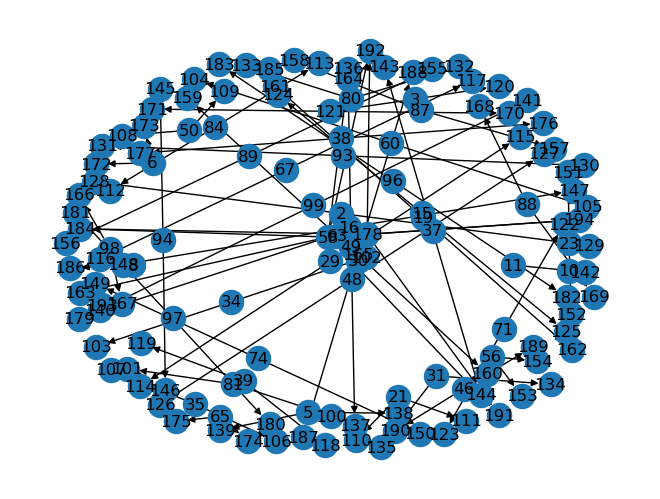

In [34]:
nx.draw(tracker.network, with_labels=True)

In [ ]:
all_images_feature_over_time = {}
for i in trange(0, len(file_list)):
    file_name = file_list[i]
    try:
        image = imread(file_name)
        g = load_from_pkl(file_name[:-4]+".network")
        key = int(file_name.split("_")[-1][:-4])
        key = np.unique(image[-1,-1][image[-1, -2] == key])[0]%1000
        # extract features
        c_mating, data = extract_mating_features(image, g, key)
        dump_to_pkl(c_mating, file_name[:-4]+".mating")
        # stack features
        all_images_feature_over_time = stack_features(all_images_feature_over_time, data, os.path.basename(file_name), config=config)
    except Exception as error:
    # handle the exception
        print(file_name," : ", error)

  5%|████████▊                                                                                                                                                               | 1/19 [00:02<00:44,  2.49s/it]

/media/wd/T7/data/mating_all/20220903_YAV2104xYAV2105_003/tif/YAV2104xYAV2105_005_02_rigid_track.tif  :  [Errno 2] No such file or directory: '/media/wd/T7/data/mating_all/20220903_YAV2104xYAV2105_003/tif/YAV2104xYAV2105_005_02_rigid_track.network'
